In [ ]:
import numpy as np
import pandas as pd

def generate_eeg_csv(file_path, num_samples=1000, num_channels=32, sequence_length=100, num_classes=4):
    # Generate random EEG-like data
    eeg_data = np.random.randn(num_samples, sequence_length, num_channels)

    # Generate random labels
    labels = np.random.randint(0, num_classes, size=(num_samples,))

    # Create a DataFrame to hold the data
    columns = [f'ch{i+1}_t{t+1}' for i in range(num_channels) for t in range(sequence_length)]
    columns.append('label')

    df = pd.DataFrame(columns=columns)

    # Fill the DataFrame with the generated data
    for i in range(num_samples):
        row = eeg_data[i].flatten().tolist() + [labels[i]]
        df.loc[i] = row

    # Save to CSV
    df.to_csv(file_path, index=False)
    print(f"CSV file generated and saved to {file_path}")

# Generate the CSV file
generate_eeg_csv('simulated_eeg_data.csv')

# Preview the data
df = pd.read_csv('simulated_eeg_data.csv')
print(df.head())
print(f"\nShape of the dataset: {df.shape}")

CSV file generated and saved to simulated_eeg_data.csv
     ch1_t1    ch1_t2    ch1_t3    ch1_t4    ch1_t5    ch1_t6    ch1_t7  \
0  0.476479 -2.214869 -0.788734 -1.363838  0.707950 -0.616381  0.261543   
1  1.322375  0.920939 -1.584697  0.071845 -0.906543  0.724909 -0.506005   
2  0.740329  1.584300  0.199338  0.756085 -1.475141 -1.736246 -0.905982   
3  1.211382  1.224552 -0.976593 -1.273197 -1.245220  1.116607 -1.367446   
4 -0.017437  0.752535 -0.039958  0.676091 -1.540739  0.586242  1.465208   

     ch1_t8    ch1_t9   ch1_t10  ...  ch32_t92  ch32_t93  ch32_t94  ch32_t95  \
0  0.538986  0.187405 -0.220234  ... -0.972018  0.136172 -1.160558 -0.676962   
1  0.732900  0.072823  0.266628  ... -0.572609 -0.894146 -1.388268  0.496125   
2  0.371888 -1.148372  1.422082  ... -1.599142 -0.723635 -0.182622 -1.668517   
3 -0.758711  1.062060  0.506149  ...  0.174430  0.388717 -0.448778 -0.089323   
4 -1.039876 -1.179580 -0.438088  ...  0.102536 -2.241530 -0.297498  0.452769   

   ch32_t96  

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.2578 - loss: 1.3892 - val_accuracy: 0.1875 - val_loss: 1.3922
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.3094 - loss: 1.3719 - val_accuracy: 0.2000 - val_loss: 1.4015
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.3168 - loss: 1.3680 - val_accuracy: 0.2250 - val_loss: 1.4093
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.3862 - loss: 1.3355 - val_accuracy: 0.2188 - val_loss: 1.4232
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.4311 - loss: 1.3048 - val_accuracy: 0.2250 - val_loss: 1.4497
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.4634 - loss: 1.2677 - val_accuracy: 0.2125 - val_loss: 1.4358
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5111 - loss: 1.2146 - val_accuracy: 0.2125 - val_loss: 1.5747
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5377 - loss: 1.1311 - val_accuracy: 0.2500 -

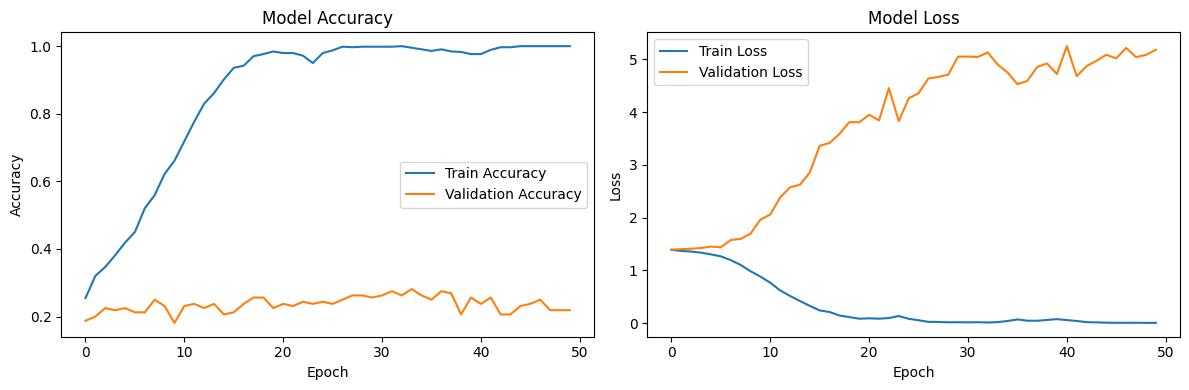

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def load_eeg_data(file_path):
    df = pd.read_csv(file_path)

    # Separate features and labels
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    # Reshape X to (num_samples, sequence_length, num_channels)
    num_samples = X.shape[0]
    sequence_length = 100
    num_channels = 32
    X = X.reshape(num_samples, sequence_length, num_channels)

    return X, y

def preprocess_eeg(X, y):
    # Normalize the EEG data
    scaler = StandardScaler()
    X_scaled = np.array([scaler.fit_transform(x) for x in X])

    # Convert labels to one-hot encoding
    y_categorical = to_categorical(y)

    return X_scaled, y_categorical

def create_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Main execution
import sys
if __name__ == "__main__":
    # Load data from CSV
    X, y = load_eeg_data("/content/simulated_eeg_data.csv")

    # Preprocess data
    X_preprocessed, y_preprocessed = preprocess_eeg(X, y)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2, random_state=42)

    # Create and compile the model
    input_shape = (X_train.shape[1], X_train.shape[2])
    num_classes = y_preprocessed.shape[1]
    model = create_lstm_model(input_shape, num_classes)

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy: {test_accuracy:.4f}")

    # Make predictions
    sample_eeg = X_test[0:1]  # Take the first test sample
    prediction = model.predict(sample_eeg)
    predicted_class = np.argmax(prediction)
    true_class = np.argmax(y_test[0])
    print(f"Predicted class: {predicted_class}, True class: {true_class}")

    # Plot training history
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(122)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()